# Regressão Linear

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame.from_dict({'mes':list(range(1,13)),
                             'faturamento':[25,38,29,115,82,114,120,160,153,190,239,175]})
df

,mes,faturamento
0,1,25
1,2,38
2,3,29
3,4,115
4,5,82
5,6,114
6,7,120
7,8,160
8,9,153
9,10,190


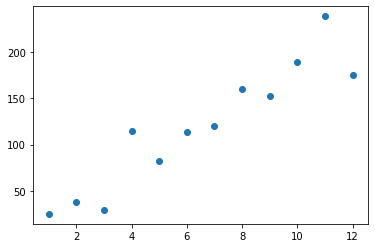

In [3]:
x = df['mes']
y = df['faturamento']
plt.scatter(x,y)

In [4]:
df[['mes','faturamento']].corr()

,mes,faturamento
mes,1.000000,0.935045
faturamento,0.935045,1.000000


## Criar Modelo Preditivo aplicando fórmulas (manualmente)

<center><strong>Equação da Regressão Linear</strong></center><br>
Essa é a equação para desenhar uma reta. Mas quando usamos essa equação para criar uma Regressão Linear especificamente, colocamos o acento circunflexo no $\hat{y}$.

$$\hat{y} = mx + b$$

<strong>m</strong> = inclinação da linha<br>
<strong>b</strong> = interceptação do y<br>
<strong>(x,y)</strong> = pontos coordenados<br>

$$m = \frac {n\sum {xy}-\sum x \sum y}{n\sum x^2-(\sum x)^2}$$<br>

$$b = \frac {\sum y-m\sum x}{n}$$

In [5]:
from model.Regression import Regression

In [6]:
reg = Regression()

In [7]:
reg.set_data(x,y)

In [8]:
reg.m

17.53846153846154

In [9]:
reg.b

5.999999999999981

In [10]:
reg.get_predict(24)

426.92307692307696

In [11]:
df['Predictions'] = reg.fit_prediction()
df

,mes,faturamento,Predictions
0,1,25,23.538462
1,2,38,41.076923
2,3,29,58.615385
3,4,115,76.153846
4,5,82,93.692308
5,6,114,111.230769
6,7,120,128.769231
7,8,160,146.307692
8,9,153,163.846154
9,10,190,181.384615


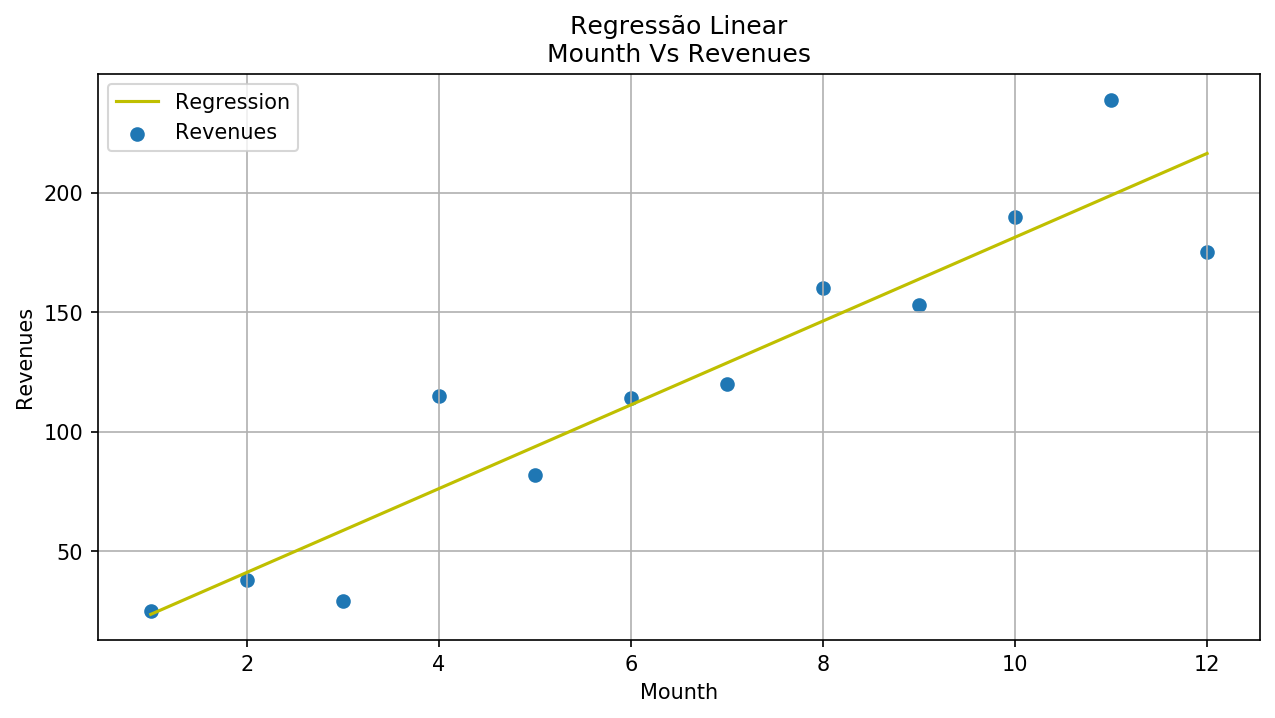

In [12]:
reg.plot_regression('Regressão Linear', ['Mounth','Revenues'])

# Coeficiente de Determinação - R-quadrado ($R²$)

$$R^2 = 1 - \frac {SQ_{res}} {SQ_{tot}} = 1 - \frac {\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \overline y)^2} $$

In [13]:
df['Residues'] = reg.r
df

,mes,faturamento,Predictions,Residues
0,1,25,23.538462,1.461538
1,2,38,41.076923,-3.076923
2,3,29,58.615385,-29.615385
3,4,115,76.153846,38.846154
4,5,82,93.692308,-11.692308
5,6,114,111.230769,2.769231
6,7,120,128.769231,-8.769231
7,8,160,146.307692,13.692308
8,9,153,163.846154,-10.846154
9,10,190,181.384615,8.615385


In [14]:
df['Residues_sqr'] = reg.sqr_r

In [15]:
reg.sum_sqr_r()

6323.538461538462

In [16]:
reg.sqr_r

0        2.136095
1        9.467456
2      877.071006
3     1509.023669
4      136.710059
5        7.668639
6       76.899408
7      187.479290
8      117.639053
9       74.224852
10    1606.159763
11    1719.059172
Name: faturamento, dtype: float64

In [17]:
df.rename({'mes':'Mounth','faturamento':'Revenues'}, inplace=True, axis=1)
df['Mean_revenues'] = df['Revenues'].mean()
df

,Mounth,Revenues,Predictions,Residues,Residues_sqr,Mean_revenues
0,1,25,23.538462,1.461538,2.136095,120.0
1,2,38,41.076923,-3.076923,9.467456,120.0
2,3,29,58.615385,-29.615385,877.071006,120.0
3,4,115,76.153846,38.846154,1509.023669,120.0
4,5,82,93.692308,-11.692308,136.710059,120.0
5,6,114,111.230769,2.769231,7.668639,120.0
6,7,120,128.769231,-8.769231,76.899408,120.0
7,8,160,146.307692,13.692308,187.479290,120.0
8,9,153,163.846154,-10.846154,117.639053,120.0
9,10,190,181.384615,8.615385,74.224852,120.0


In [18]:
reg.sum_sqr_total()

50310.0

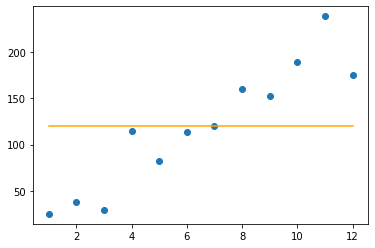

In [19]:
plt.scatter(x,y)
plt.plot(x, df['Mean_revenues'], color='orange')

In [20]:
reg.score  # RSquare

0.8743085179578918

In [21]:
reg.rmse.round(4)

22.9556

# Regra Empírica 68-95-99.7

### Um desvio padrão 68% 

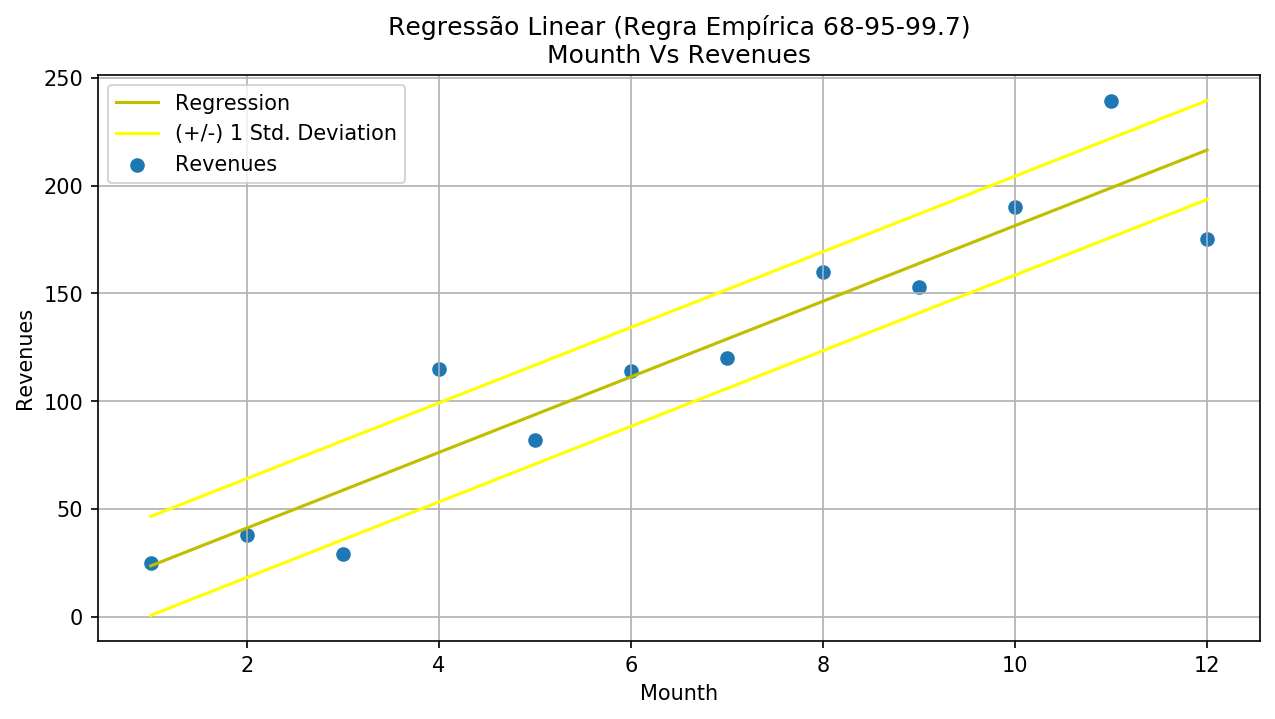

In [22]:
reg.plot_regression('Regressão Linear (Regra Empírica 68-95-99.7)', ['Mounth','Revenues'], 1)

### Dois desvios padrões 95%

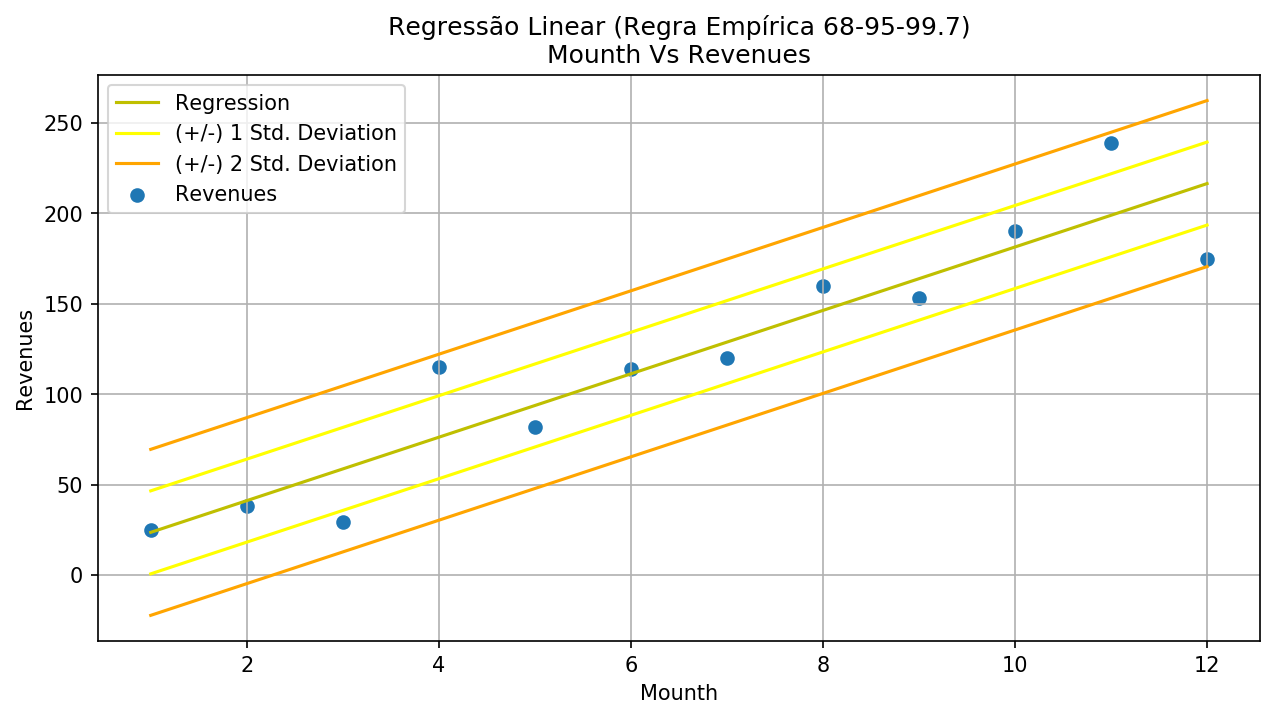

In [23]:
reg.plot_regression('Regressão Linear (Regra Empírica 68-95-99.7)', ['Mounth','Revenues'], 2)

### Três desvios padrões 99.7%

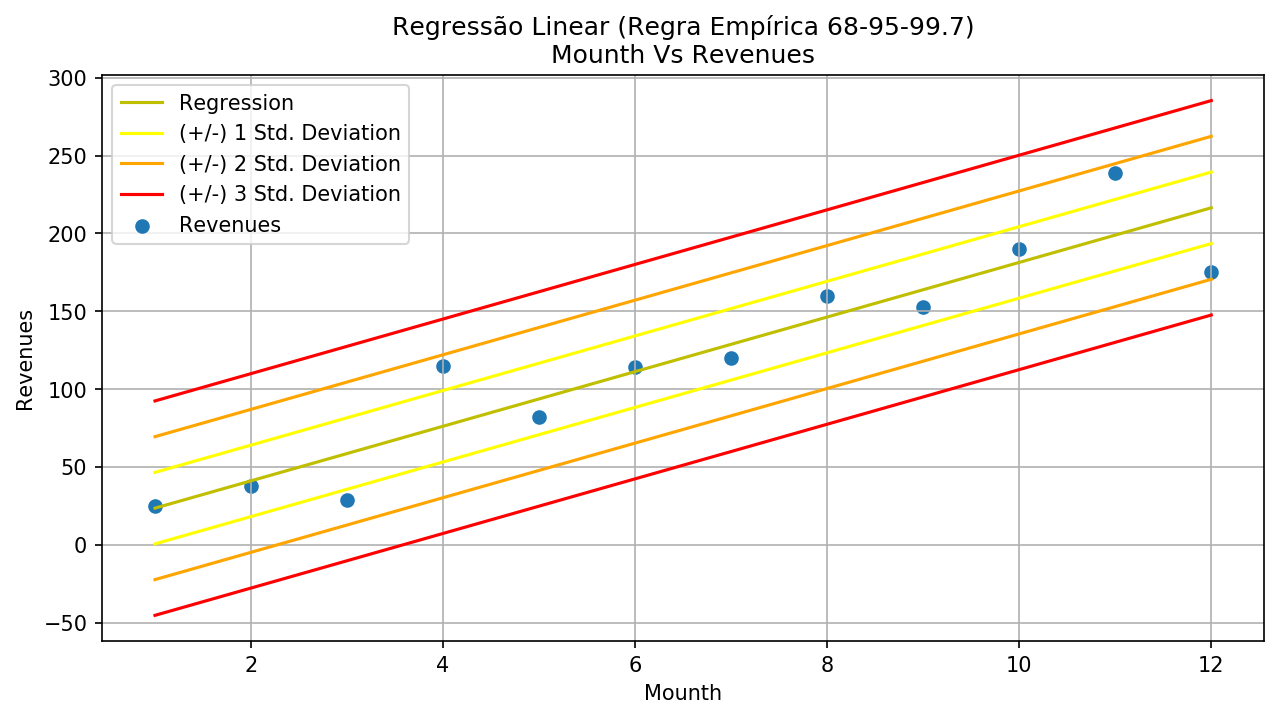

In [24]:
reg.plot_regression('Regressão Linear (Regra Empírica 68-95-99.7)', ['Mounth','Revenues'], 3)

In [36]:
import statsmodels.api as sm
import numpy as np

In [30]:
x = reg.x
x

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
Name: mes, dtype: int64

In [31]:
y = reg.y
y

0      25
1      38
2      29
3     115
4      82
5     114
6     120
7     160
8     153
9     190
10    239
11    175
Name: faturamento, dtype: int64

### Add constant $$\hat{y} = mx + b$$

In [32]:
x = sm.add_constant(x.values)
x

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.]])

### Model Training

In [33]:
model = sm.OLS(y,x).fit()
model

In [34]:
sm_pred = model.predict()
sm_pred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

In [38]:
np.array(reg.fit_prediction())

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

In [44]:
reg.score # R-squared

0.8743085179578918

In [45]:
reg.m # x1 coef

17.53846153846154

In [39]:
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            faturamento   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     69.56
Date:                Fri, 07 Aug 2020   Prob (F-statistic):           8.16e-06
Time:                        11:18:36   Log-Likelihood:                -54.630
No. Observations:                  12   AIC:                             113.3
Df Residuals:                      10   BIC:                             114.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0000     15.477      0.388      0.706     -28.484      40.484
x1            17.5385      2.103      8.340      0.000      12.853      22.224
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   2.757
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.142
Skew:                           0.175   Prob(JB):                        0.932
Kurtosis:                       2.599   Cond. No.                         15.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
from statsmodels.tools.eval_measures import rmse

In [47]:
rmse(y, sm_pred)

22.955642845747942

In [48]:
reg.rmse

22.95564284574794

In [57]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()

### Reshape x (remodelar x)
Se X não possuir múltiplas variáveis, sklearn solicita que modifiquemos o formato

In [58]:
x = np.array(reg.x).reshape(-1,1)

In [61]:
sk_model = regressor.fit(x, y)

In [62]:
sk_pred = sk_model.predict(x)
sk_pred

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

In [63]:
np.array(reg.fit_prediction())

array([ 23.53846154,  41.07692308,  58.61538462,  76.15384615,
        93.69230769, 111.23076923, 128.76923077, 146.30769231,
       163.84615385, 181.38461538, 198.92307692, 216.46153846])

In [66]:
sk_model.predict(np.array([24]).reshape(-1,1))

array([426.92307692])

In [67]:
reg.get_predict(24)

426.92307692307696

In [68]:
regressor.score(x,y)

0.8743085179578917

In [69]:
reg.score

0.8743085179578918

In [71]:
regressor.coef_

array([17.53846154])

In [72]:
reg.m

17.53846153846154

In [73]:
regressor.intercept_

6.000000000000028

In [74]:
reg.b

5.999999999999981

### RMSE

In [76]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, sk_pred)
mse

526.9615384615386

In [78]:
rmse = mse**0.5
rmse

22.95564284574794

In [79]:
reg.rmse

22.95564284574794